# Assignment 5

## Xuan Hong

## 60135167

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
from scipy.integrate import odeint
import scipy.misc as mis
%matplotlib inline

## Question 1

In [6]:
def lorenz(sigma,rho,beta,u0,t0,tf,N,plot_vars = [0,1]):
    '''Computes and plots the approximation solution of the Lorenz equations.
    
    Parameters
    -----------
    sigma, rho, beta: the calculating parameters σ, ρ and β
    u0 : a list of numbers of length 3 defining the initial conditions [x(t0),y(t0),z(t0)]
    t0 : the start of the interval of integration [t0, tf ]
    tf : the end of the interval of integration [t0, tf ]
    N : an integer, the number of evenly spaced points from t0 to tf
    plot_vars : a list of length 2, Default value is [0,1],
                if plot_vars is [0,1] then plot the solution x versus y,
                if plot_vars is [1,2] then plot the solution y versus z. 
    
    Return
    -------
    returns a 2D Numpy array with 4 columns with the array of t values, x values, y values
    and z values of the solution.
    '''
    # define function f(u,t)
    def f(u,t):
        # set initial values
        x0 = u[0]
        y0 = u[1]
        z0 = u[2]
    
        # compute the equations
        dxdt = sigma * (y0 - x0)
        dydt = x0 * (rho - z0) - y0
        dzdt = x0 * y0 - beta * z0
        # set the array of the solutions
        solutions = np.array([dxdt,dydt,dzdt])
        return solutions
    
    # set t
    t = np.linspace(t0,tf,N+1)
    # use odeint to solve the ODE systems
    U = odeint(f,u0,t)
    # get the result
    result = np.column_stack([t,U[:,0],U[:,1],U[:,2]]) 
    
    # set the horizontal and vertical index
    h = plot_vars[0]
    v = plot_vars[1]
    # plot the values
    plt.plot(U[:,h],U[:,v])
    plt.show()
    return result

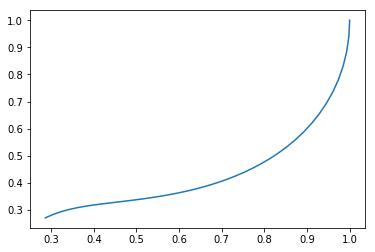

array([[ 0.        ,  1.        ,  1.        ,  1.        ],
       [ 0.06283185,  0.99810745,  0.93914135,  0.99806985],
       [ 0.12566371,  0.9927452 ,  0.88221955,  0.99247135],
       [ 0.18849556,  0.98436342,  0.82920281,  0.98352233],
       [ 0.25132741,  0.97338216,  0.7800333 ,  0.97156752],
       [ 0.31415927,  0.96019155,  0.73462585,  0.95696436],
       [ 0.37699112,  0.94515192,  0.69286877,  0.94007142],
       [ 0.43982297,  0.92859411,  0.65462618,  0.92123907],
       [ 0.50265482,  0.91081989,  0.61974137,  0.90080234],
       [ 0.56548668,  0.89210254,  0.58804083,  0.87907561],
       [ 0.62831853,  0.87268775,  0.5593385 ,  0.85634917],
       [ 0.69115038,  0.85279464,  0.53343999,  0.83288707],
       [ 0.75398224,  0.83261697,  0.51014658,  0.80892619],
       [ 0.81681409,  0.81232458,  0.48925881,  0.78467638],
       [ 0.87964594,  0.79206488,  0.47057969,  0.76032115],
       [ 0.9424778 ,  0.77196444,  0.45391727,  0.73601902],
       [ 1.00530965,  0.

In [7]:
lorenz(1,1,1,[1,1,1],0,2*np.pi,100,plot_vars = [0,1])

## Question 2

In [4]:
def damping(m,b,k,F,u0,t0,tf,N):
    '''compute the approximation solution of the nonlinear damping equation:my′′ + by′|y′| + ky = F(t)
    
    Parameters
    -------------
    m, b, k: are positive numbers in the nonlinear damping equation
    F : a function of one variable F (t) in the nonlinear damping equation
    u0 : a list of numbers of length 2 defining the initial conditions [y(t0),y′(t0)]
    t0 : the start of the interval of integration [t0, tf ]
    tf : the end of the interval of integration [t0, tf ]
    N : an integer specifying the number of evenly spaced points from t0 to tf
    
    Return
    -------
    plots the approximation of the solution y(t) and returns a 2D Numpy array with 2 columns with
    the array of t values and the array of y values of the solution.
    
    '''
    # define function f1(u,t)
    def f1(u,t):
        dudt = np.zeros(2)
        dudt[0] = u[1]
        dudt[1] = (F(t) - b*u[1]*abs(u[1]) - k*u[0])/m 
        return dudt
    # set t
    t = np.linspace(t0,tf,N+1)
    # use odeint to solve the ODE
    U = odeint(f1,u0,t)
    # get the result
    result = np.column_stack([t,U[:,0]])
    # plot t and y
    plt.plot(t,U[:,0])
    plt.show()
    return result   

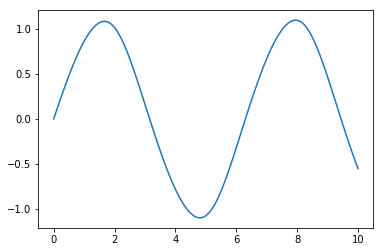

array([[  0.00000000e+00,   0.00000000e+00],
       [  1.00000000e-01,   9.98374254e-02],
       [  2.00000000e-01,   1.98730387e-01],
       [  3.00000000e-01,   2.95814303e-01],
       [  4.00000000e-01,   3.90299741e-01],
       [  5.00000000e-01,   4.81459194e-01],
       [  6.00000000e-01,   5.68614432e-01],
       [  7.00000000e-01,   6.51124828e-01],
       [  8.00000000e-01,   7.28376759e-01],
       [  9.00000000e-01,   7.99773892e-01],
       [  1.00000000e+00,   8.64728060e-01],
       [  1.10000000e+00,   9.22650357e-01],
       [  1.20000000e+00,   9.72941941e-01],
       [  1.30000000e+00,   1.01498395e+00],
       [  1.40000000e+00,   1.04812573e+00],
       [  1.50000000e+00,   1.07167038e+00],
       [  1.60000000e+00,   1.08485611e+00],
       [  1.70000000e+00,   1.08683159e+00],
       [  1.80000000e+00,   1.07669744e+00],
       [  1.90000000e+00,   1.05383498e+00],
       [  2.00000000e+00,   1.01810122e+00],
       [  2.10000000e+00,   9.69833178e-01],
       [  

In [5]:
damping(1,1,1,np.cos,[0,1],0,10,100)